# SQL Section

In [1]:
# Importing sqlite3
import sqlite3
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
# Creating a database called "Bankdb"
bank_campaign = sqlite3.connect('Bankdb')

In [3]:
# Introducing 'cursors' syntax to allow us execute SQL queries against a database
cur = bank_campaign.cursor()

In [4]:
cur.execute("")

In [5]:
# Reading in csv dataset
df=pd.read_csv("Bank_Campaign.csv")

In [6]:
# Creating a table named Bankdata
df.to_sql('Bankdata', bank_campaign, index=False, if_exists='replace')

41188

In [7]:
pd.read_sql_query('SELECT * FROM Bankdata', bank_campaign)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
# Checking to see if there are irregulatities in datatype

df.dtypes 

# (There are no irregularities)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed         object
dtype: object

## What was the duration of the longest call?

In [9]:
pd.read_sql_query('SELECT min(duration) as Minimum, max(duration) as Maximum from Bankdata', bank_campaign)

,Minimum,Maximum
0,0,4918


##  Which means of contact type was most used?

In [10]:
pd.read_sql_query('SELECT contact, COUNT(contact) as Count from Bankdata group by contact',  bank_campaign)


,contact,Count
0,cellular,26144
1,telephone,15044


## Checking the uniques Jobs of customers

In [11]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

## What customer job type recorded the least subscription?

In [12]:
pd.read_sql_query("SELECT job, COUNT(job) as Count from Bankdata WHERE subscribed =='yes' group by job ORDER BY Count",  bank_campaign)

,job,Count
0,unknown,37
1,housemaid,106
2,entrepreneur,124
3,unemployed,144
4,self-employed,149
5,student,275
6,services,323
7,management,328
8,retired,434
9,blue-collar,638


In [13]:
df['age'].unique() # Checking the unique ages of customers

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

##  What is the average call duration across different age groups who subscribed?

In [14]:
pd.read_sql_query("SELECT age, avg(duration) as AvgDuration from Bankdata WHERE subscribed =='yes' group by age",  bank_campaign)

,age,AvgDuration
0,17,697.000000
1,18,417.916667
2,19,357.800000
3,20,350.217391
4,21,444.034483
...,...,...
70,87,273.000000
71,88,290.666667
72,89,279.500000
73,92,613.000000


## What is the average call duration across different age groups who didn’t subscribe?

In [15]:
pd.read_sql_query("SELECT age, avg(duration) as AvgDuration from Bankdata WHERE subscribed =='no' group by age",  bank_campaign)

,age,AvgDuration
0,17,235.333333
1,18,249.687500
2,19,193.045455
3,20,254.690476
4,21,192.821918
...,...,...
70,88,173.538462
71,91,530.000000
72,92,271.000000
73,94,134.000000


## Python

In [16]:
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()

# pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [17]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
# Checking for missing values

df.isna().sum() # No missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [19]:
df.info() # information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
# Replace all 'unkown to 'Nan'
df1=df.replace('unknown', np.NaN)

In [21]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [22]:
# Checking again for missing values

df1.isna().sum() 

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [23]:
# Checking the percentage of missing values in dataset
round(100*(df1.isnull().sum()/len(df1)),2)

age                0.00
job                0.80
marital            0.19
education          4.20
default           20.87
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
subscribed         0.00
dtype: float64

## EDA

In [24]:
# Checking the distribution in the dataset

In [25]:
df1['subscribed'].value_counts()

no     36548
yes     4640
Name: subscribed, dtype: int64

In [26]:
S_table=df['subscribed'].value_counts().to_frame()

In [27]:
x=S_table.index
y=S_table['subscribed']

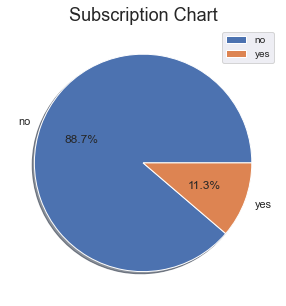

In [28]:
plt.figure(figsize=(5,5))
plt.pie(y,labels=x,shadow=True,autopct='%1.1f%%')
plt.legend(title="subscribed")
plt.legend(loc=1, prop={'size': 10})
plt.title("Subscription Chart", fontsize=18)
plt.show()

# The dataset is unbalanced as evident in the chart below because there are way less subscribers than non subscribers, more NO's than YES'

In [29]:
# Analysis of the marital status of clients

df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [30]:
df.groupby(['marital','subscribed'])['marital'].count()

#Married: approximately 90% turned down the subscription offer, while 10% agreed to it
#Single: 86% turned down the subscription offer, 14% agreed to it
#Divorced: again 90% refused to subscribe, while 10% accepted to

marital   subscribed
divorced  no             4136
          yes             476
married   no            22396
          yes            2532
single    no             9948
          yes            1620
unknown   no               68
          yes              12
Name: marital, dtype: int64

In [31]:
# this is the values in the age columns
P_table=df['age'].value_counts().to_frame()
P_table

,age
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
89,2
91,2
94,1
87,1


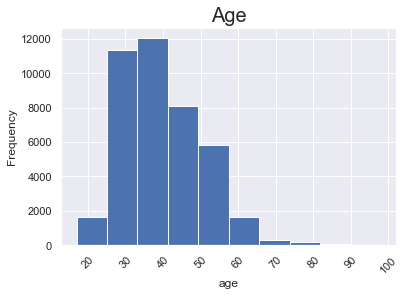

<Figure size 576x720 with 0 Axes>

In [32]:
df.age.hist()
plt.xticks(rotation = 45)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.savefig('hist_age')
plt.title('Age', fontsize = 20)
plt.figure(figsize=(8,10))
plt.show() # from this graphical represntation we can see the bank customers are more of 40 years

In [33]:
# Analysis of the various occupations of clients

J_table=df['job'].value_counts().to_frame()
J_table

,job
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060
unemployed,1014


In [34]:
# To count the values in the job columns
P_table=df['job'].value_counts().to_frame()
P_table

,job
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060
unemployed,1014


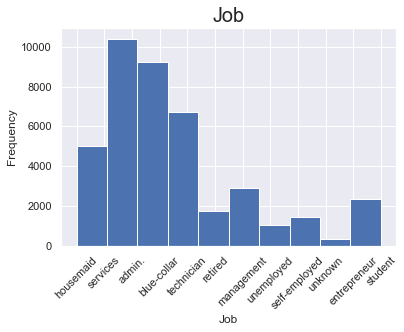

<Figure size 576x720 with 0 Axes>

In [35]:
df.job.hist()
plt.xticks(rotation = 45)
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.savefig('hist_job')
plt.title('Job', fontsize = 20)
plt.figure(figsize=(8,10))
plt.show()

In [36]:
# marital value count and graphical representation
df['marital'].value_counts().to_frame()

,marital
married,24928
single,11568
divorced,4612
unknown,80


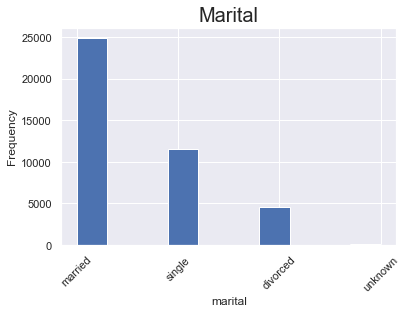

<Figure size 576x864 with 0 Axes>

In [37]:
df.marital.hist()
plt.xticks(rotation = 45)
plt.xlabel('marital')
plt.ylabel('Frequency')
plt.title('Marital', fontsize = 20)
plt.savefig('hist_marital')
plt.figure(figsize=(8,12))
plt.show() # from the distribution it shows that most of the bank customers are married

In [38]:
# education value count and graphical representation
df['education'].value_counts().to_frame()

,education
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


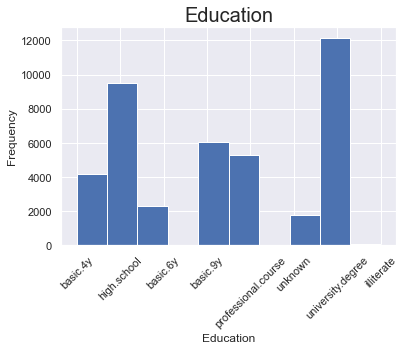

<Figure size 576x864 with 0 Axes>

In [39]:
df.education.hist()
plt.xticks(rotation = 45)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education', fontsize = 20)
plt.savefig('hist_education')
plt.figure(figsize=(8,12))
plt.show() # this distribution shows that there the university degree holders are the highest in this certain bank

In [40]:
# default value count and graphical representation
P_table=df['default'].value_counts().to_frame()
P_table

,default
no,32588
unknown,8597
yes,3


In [41]:
x=P_table.index
y=P_table['default']

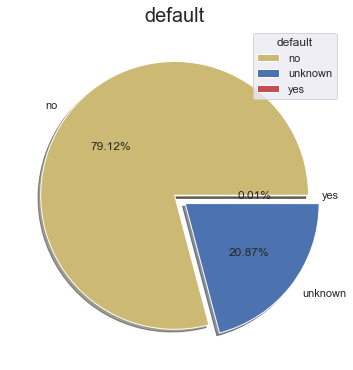

In [42]:
plt.figure(figsize=(6,8))
plt.pie(y,labels=x,explode = [0.0,0.1,0.0], shadow=True, colors=['y','b','r','purple'],autopct='%1.2f%%')
plt.legend(title ='default')
plt.title('default', fontsize = 20)        
plt.show() # this distribution shows that this bank customers hardly default on loan repayment as no. of "no default' is 79.12%

In [43]:
P_table=df['housing'].value_counts().to_frame()
P_table

,housing
yes,21576
no,18622
unknown,990


In [44]:
x=P_table.index
y=P_table['housing']

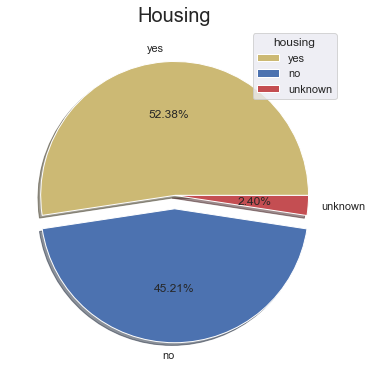

In [45]:
plt.figure(figsize=(6,8))
plt.pie(y,labels=x,explode = [0.0,0.1,0.0], shadow=True, colors=['y','b','r','purple'],autopct='%1.2f%%')
plt.legend(title ='housing')
plt.title('Housing', fontsize = 20)        
plt.show()

In [46]:
# loan value count and graphical representation
P_table=df['loan'].value_counts().to_frame()
P_table

,loan
no,33950
yes,6248
unknown,990


In [47]:
x=P_table.index
y=P_table['loan']

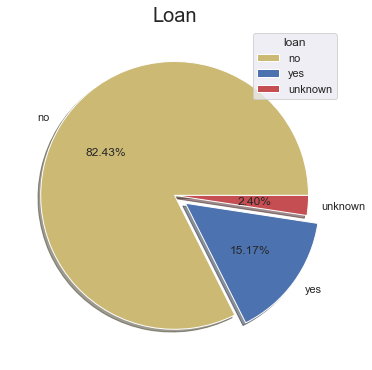

In [48]:
plt.figure(figsize=(6,8))
plt.pie(y,labels=x,explode = [0.0,0.1,0.0], shadow=True, colors=['y','b','r','purple'],autopct='%1.2f%%')
plt.legend(title ='loan')
plt.title('Loan', fontsize = 20)        
plt.show() # this shows that 82.43% are not interested on the bank loan 

In [49]:
# contact value count and graphical representation
P_table=df['contact'].value_counts().to_frame()
P_table

,contact
cellular,26144
telephone,15044


In [50]:
x=P_table.index
y=P_table['contact']

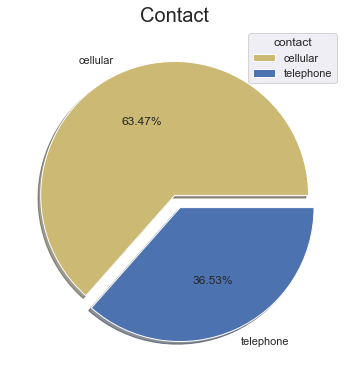

In [51]:
plt.figure(figsize=(6,8))
plt.pie(y,labels=x,explode = [0.0,0.1], shadow=True, colors=['y','b','r','purple'],autopct='%1.2f%%')
plt.legend(title ='contact')
plt.title('Contact', fontsize = 20)        
plt.show()

In [52]:
# value count for month and graphical representation
df['month'].value_counts().to_frame()

,month
may,13769
jul,7174
aug,6178
jun,5318
nov,4101
apr,2632
oct,718
sep,570
mar,546
dec,182


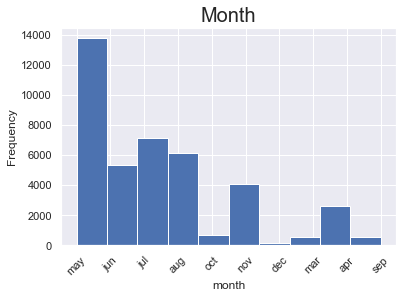

<Figure size 576x864 with 0 Axes>

In [53]:
df.month.hist()
plt.xticks(rotation = 45)
plt.xlabel('month')
plt.ylabel('Frequency')
plt.savefig('hist_month')
plt.title('Month', fontsize = 20)
plt.figure(figsize=(8,12))
plt.show()

In [54]:
# value count and graphical representation of poutcome
P_table=df['poutcome'].value_counts().to_frame()
P_table

,poutcome
nonexistent,35563
failure,4252
success,1373


In [55]:
x=P_table.index
y=P_table['poutcome']

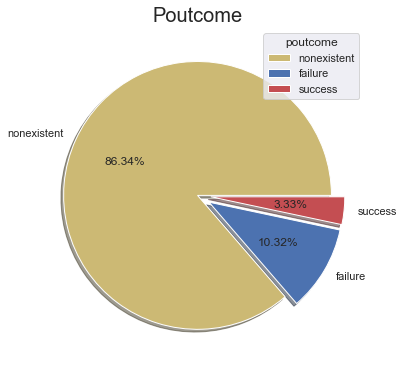

In [56]:
plt.figure(figsize=(6,8))
plt.pie(y,labels=x,explode = [0.0,0.1,0.1], shadow=True, colors=['y','b','r','purple'],autopct='%1.2f%%')
plt.legend(title ='poutcome')
plt.title('Poutcome', fontsize = 20)        
plt.show()

## Splitting

In [57]:
## Splitting the data into train and test
train= df.sample(frac=0.8, random_state=123)
test=df.drop(train.index)

In [58]:
train.shape

(32950, 21)

In [59]:
test.shape

(8238, 21)

In [60]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
8107,42,services,married,high.school,no,no,no,telephone,jun,mon,217,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
38463,37,blue-collar,married,basic.6y,no,unknown,unknown,cellular,oct,fri,93,1,999,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,no
1933,41,blue-collar,married,basic.6y,unknown,no,no,telephone,may,fri,407,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
8352,42,admin.,married,university.degree,unknown,yes,no,telephone,jun,tue,215,3,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
37164,56,entrepreneur,married,high.school,no,yes,no,cellular,aug,wed,131,5,999,1,failure,-2.9,92.201,-31.4,0.884,5076.2,no


In [61]:
train.shape

(32950, 21)

In [62]:
train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [63]:
train1=train.replace('unknown', np.NaN) ## To reveal missing values

In [64]:
train1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
8107,42,services,married,high.school,no,no,no,telephone,jun,mon,217,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
38463,37,blue-collar,married,basic.6y,no,NaN,NaN,cellular,oct,fri,93,1,999,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,no
1933,41,blue-collar,married,basic.6y,NaN,no,no,telephone,may,fri,407,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
8352,42,admin.,married,university.degree,NaN,yes,no,telephone,jun,tue,215,3,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
37164,56,entrepreneur,married,high.school,no,yes,no,cellular,aug,wed,131,5,999,1,failure,-2.9,92.201,-31.4,0.884,5076.2,no


In [65]:
train1.isna().sum() ## Missing values now visible

age                  0
job                277
marital             61
education         1389
default           6855
housing            790
loan               790
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [66]:
round(100*(train1.isnull().sum()/len(train1)),2)

age                0.00
job                0.84
marital            0.19
education          4.22
default           20.80
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
subscribed         0.00
dtype: float64

In [67]:
train1.drop('default',axis=1,inplace=True) # Dropping 'default' column because it has 20% misssing values that cannot be replaced logically and dropping all will significantly reduce the dataset, hence dropping the entire 'default' column seem to be more appropriate in this scenario/

In [68]:
train1.isna().sum()

age                  0
job                277
marital             61
education         1389
housing            790
loan               790
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [69]:
# Dropping all missing values
train1.dropna(axis=0,inplace=True)

In [70]:
train1.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [71]:
train1.shape

(30583, 20)

In [72]:
train1['job'].unique()

array(['services', 'blue-collar', 'admin.', 'entrepreneur', 'technician',
       'student', 'self-employed', 'retired', 'unemployed', 'management',
       'housemaid'], dtype=object)

In [73]:
train1['housing'].unique()

array(['no', 'yes'], dtype=object)

In [74]:
train1['loan'].unique()

array(['no', 'yes'], dtype=object)

In [75]:
train1['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [76]:
#Reseting index
train1=train1.reset_index(drop=True)

# Encoding

In [77]:
# Making a list of Nominal and ordinal variables
nom_feat = ['marital', 'housing', 'loan', 'contact', 'poutcome',]
ord_feat = ['job','month','day_of_week']

In [78]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

t=('illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course')

# define ordinal encoding
encoder1 = OrdinalEncoder(categories=[t])

# transform data
result = encoder1.fit_transform(train1['education'].values.reshape(-1,1))

train1['education'] = result

In [79]:
train1 

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,42,services,married,4.0,no,no,telephone,jun,mon,217,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,41,blue-collar,married,2.0,no,no,telephone,may,fri,407,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,42,admin.,married,5.0,yes,no,telephone,jun,tue,215,3,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
3,56,entrepreneur,married,4.0,yes,no,cellular,aug,wed,131,5,999,1,failure,-2.9,92.201,-31.4,0.884,5076.2,no
4,56,entrepreneur,married,5.0,yes,yes,telephone,jun,thu,82,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30578,59,technician,single,5.0,yes,no,cellular,aug,thu,95,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
30579,44,admin.,married,5.0,no,yes,cellular,aug,wed,227,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
30580,26,blue-collar,married,2.0,yes,yes,telephone,may,fri,353,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30581,42,blue-collar,married,2.0,no,no,telephone,may,tue,99,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [80]:
ordinal_encoder= OrdinalEncoder()
ab = ordinal_encoder.fit_transform(train1[ord_feat])
cd = pd.DataFrame(ab, columns=ord_feat)
train1.drop(ord_feat, axis=1, inplace=True)
train1=pd.concat([train1,cd],axis=1)

In [81]:
cd.shape

(30583, 3)

In [82]:
train1

,age,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,job,month,day_of_week
0,42,married,4.0,no,no,telephone,217,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,7.0,4.0,1.0
1,41,married,2.0,no,no,telephone,407,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,1.0,6.0,0.0
2,42,married,5.0,yes,no,telephone,215,3,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no,0.0,4.0,3.0
3,56,married,4.0,yes,no,cellular,131,5,999,1,failure,-2.9,92.201,-31.4,0.884,5076.2,no,2.0,1.0,4.0
4,56,married,5.0,yes,yes,telephone,82,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30578,59,single,5.0,yes,no,cellular,95,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no,9.0,1.0,2.0
30579,44,married,5.0,no,yes,cellular,227,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,0.0,1.0,4.0
30580,26,married,2.0,yes,yes,telephone,353,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,6.0,0.0
30581,42,married,2.0,no,no,telephone,99,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,6.0,3.0


In [83]:
train1['subscribed']=train1['subscribed'].map({'no':0,'yes':1})

In [84]:
train1.head()

,age,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,job,month,day_of_week
0,42,married,4.0,no,no,telephone,217,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,0,7.0,4.0,1.0
1,41,married,2.0,no,no,telephone,407,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,1.0,6.0,0.0
2,42,married,5.0,yes,no,telephone,215,3,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0,0.0,4.0,3.0
3,56,married,4.0,yes,no,cellular,131,5,999,1,failure,-2.9,92.201,-31.4,0.884,5076.2,0,2.0,1.0,4.0
4,56,married,5.0,yes,yes,telephone,82,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,2.0,4.0,2.0


In [85]:
encoder2 = OneHotEncoder(handle_unknown='ignore',drop='first',dtype=int)

encodertrain = pd.DataFrame(encoder2.fit_transform(train1[nom_feat]).toarray())
encodertrain.columns = encoder2.get_feature_names_out()

train1 = train1.join(encodertrain)

In [86]:
train1.drop(nom_feat,axis=1,inplace=True)

In [87]:
train1

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,job,month,day_of_week,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,42,4.0,217,4,999,0,1.4,94.465,-41.8,4.865,5228.1,0,7.0,4.0,1.0,1,0,0,0,1,1,0
1,41,2.0,407,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,1.0,6.0,0.0,1,0,0,0,1,1,0
2,42,5.0,215,3,999,0,1.4,94.465,-41.8,4.864,5228.1,0,0.0,4.0,3.0,1,0,1,0,1,1,0
3,56,4.0,131,5,999,1,-2.9,92.201,-31.4,0.884,5076.2,0,2.0,1.0,4.0,1,0,1,0,0,0,0
4,56,5.0,82,1,999,0,1.4,94.465,-41.8,4.961,5228.1,0,2.0,4.0,2.0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30578,59,5.0,95,1,999,0,1.4,93.444,-36.1,4.964,5228.1,0,9.0,1.0,2.0,0,1,1,0,0,1,0
30579,44,5.0,227,1,999,0,1.4,93.444,-36.1,4.965,5228.1,0,0.0,1.0,4.0,1,0,0,1,0,1,0
30580,26,2.0,353,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1.0,6.0,0.0,1,0,1,1,1,1,0
30581,42,2.0,99,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1.0,6.0,3.0,1,0,0,0,1,1,0


In [88]:
train1.shape

(30583, 22)

In [89]:
X_train = train1.drop(['subscribed'],axis=1) # Excluding the target variable from dataset
y_train = train1['subscribed'] # seperating the dependent or target variable to stand alone

In [90]:
cols=X_train.columns

# Scaling

In [91]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [92]:
# y_train=y_train.map({'no':0,'yes':1,})

# Checking for Multicollinearity

<AxesSubplot:>

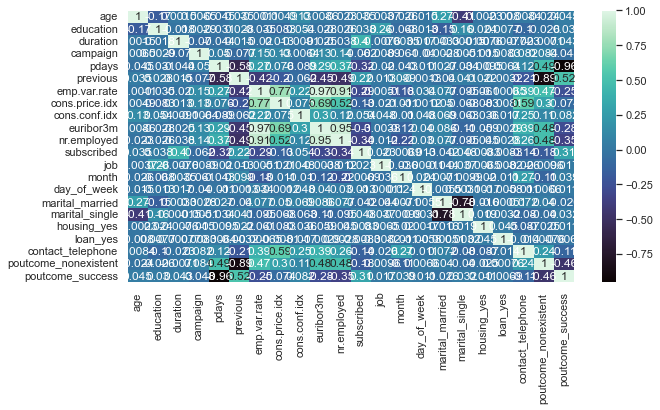

In [93]:
cors=train1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cors, annot=True, cmap='mako') #cmap helps you specify the color combination you want

<AxesSubplot: >

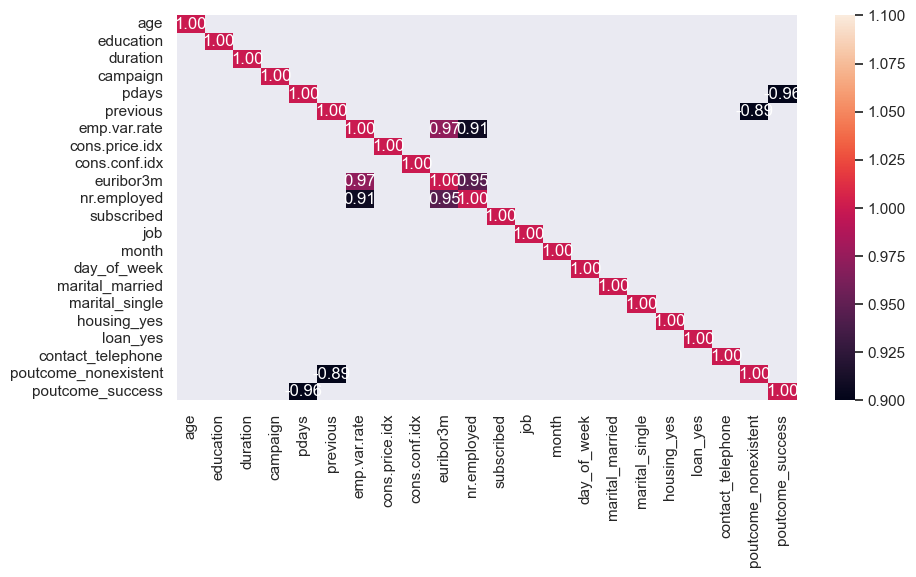

In [99]:
R=train1.corr()
mask = R[(R >= 0.85) | (R <= -0.85)]

plt.figure(figsize=(10,5))
sns.heatmap(mask, vmin=1, vmax=1, annot=True, fmt='0.2f')

In [ ]:
X_train.drop(['pdays','emp.var.rate','nr.employed'],axis=1,inplace=True) # Dropping columns due to multi-collinearity

In [ ]:
cols=X_train.columns
cols

# Feature Importance

## Which variables affect subscriptions the most?

Using Decission tree method and Mutual information classification Method, features are arranged in decending order with the most important to the target being at the top and the least important at the bottom of the list. 

In [101]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30578    0
30579    0
30580    0
30581    0
30582    0
Name: subscribed, Length: 30583, dtype: int64

In [102]:
# y_train=y_train.map({'no':0,'yes':1,})

In [103]:
train1.head(1)

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,job,month,day_of_week,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,42,4.0,217,4,999,0,1.4,94.465,-41.8,4.865,5228.1,0,7.0,4.0,1.0,1,0,0,0,1,1,0


In [104]:
C=train1.corr()['subscribed'].sort_values(ascending=False)
C

subscribed              1.000000
duration                0.404586
poutcome_success        0.310801
previous                0.220606
cons.conf.idx           0.054324
marital_single          0.047659
education               0.038169
age                     0.035191
job                     0.023411
day_of_week             0.013393
housing_yes             0.008339
month                  -0.006923
loan_yes               -0.008305
marital_married        -0.041502
campaign               -0.062037
cons.price.idx         -0.127263
contact_telephone      -0.139587
poutcome_nonexistent   -0.181812
emp.var.rate           -0.287784
euribor3m              -0.296375
pdays                  -0.318291
nr.employed            -0.344544
Name: subscribed, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

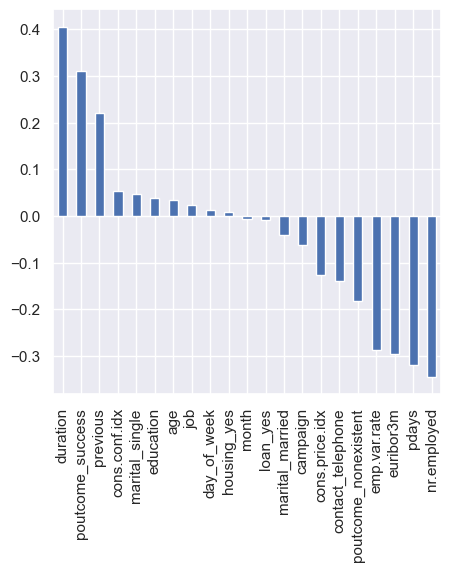

In [105]:
plt.figure(figsize=(5,5))
C.drop('subscribed').plot.bar()
plt.show

In [106]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30578    0
30579    0
30580    0
30581    0
30582    0
Name: subscribed, Length: 30583, dtype: int64

In [107]:
## Method: Decission tree method

decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = cols

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
duration,0.448645
euribor3m,0.292563
age,0.049073
cons.conf.idx,0.040668
month,0.028961
poutcome_success,0.028660
day_of_week,0.018678
education,0.018435
job,0.015729
campaign,0.014736


In [108]:
## Method: Mutual information classification Method
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X_train,y_train)

imp=pd.DataFrame(mutual_info_classif(X_train,y_train),index=cols)

imp.columns=['Importance']

imp.sort_values(by='Importance',ascending=False)

,Importance
duration,0.078408
euribor3m,0.068013
cons.price.idx,0.066264
cons.conf.idx,0.063455
poutcome_success,0.031115
month,0.026890
poutcome_nonexistent,0.018352
previous,0.017159
contact_telephone,0.012403
age,0.011703


In [109]:
# We see the following features as those affecting 'subscription' the most:
# Duration
# Euribor3m
# age
# cons.conf.idx
# month
# cons.price.idx	and
# poutcome_success

# This is not to say that other variables are irrelevant, as such contact_telephone, previous, education,
#                                                                 will also constitute features selected.

In [110]:
cols

Index(['age', 'education', 'duration', 'campaign', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job', 'month',
       'day_of_week', 'marital_married', 'marital_single', 'housing_yes',
       'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [111]:
X_train1=train1[cols]
X_train1

,age,education,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,job,month,day_of_week,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,42,4.0,217,4,0,94.465,-41.8,4.865,7.0,4.0,1.0,1,0,0,0,1,1,0
1,41,2.0,407,4,0,93.994,-36.4,4.855,1.0,6.0,0.0,1,0,0,0,1,1,0
2,42,5.0,215,3,0,94.465,-41.8,4.864,0.0,4.0,3.0,1,0,1,0,1,1,0
3,56,4.0,131,5,1,92.201,-31.4,0.884,2.0,1.0,4.0,1,0,1,0,0,0,0
4,56,5.0,82,1,0,94.465,-41.8,4.961,2.0,4.0,2.0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30578,59,5.0,95,1,0,93.444,-36.1,4.964,9.0,1.0,2.0,0,1,1,0,0,1,0
30579,44,5.0,227,1,0,93.444,-36.1,4.965,0.0,1.0,4.0,1,0,0,1,0,1,0
30580,26,2.0,353,2,0,93.994,-36.4,4.857,1.0,6.0,0.0,1,0,1,1,1,1,0
30581,42,2.0,99,1,0,93.994,-36.4,4.857,1.0,6.0,3.0,1,0,0,0,1,1,0


In [112]:
X_train1.shape

(30583, 18)

In [113]:
scaler = MinMaxScaler()

scaler.fit(X_train1)

X_train = scaler.transform(X_train1)

#                 TEST DATA

In [114]:
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
17,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,440,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
22,55,retired,single,high.school,no,yes,no,telephone,may,mon,342,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [115]:
test.shape

(8238, 21)

In [116]:
test.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [117]:
test1=test.replace('unknown', np.NaN) ## To reveal missing values

In [118]:
test1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
17,46,blue-collar,married,basic.6y,NaN,yes,yes,telephone,may,mon,440,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
22,55,retired,single,high.school,no,yes,no,telephone,may,mon,342,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41162,60,blue-collar,married,basic.4y,no,yes,no,cellular,nov,tue,347,2,4,1,success,-1.1,94.767,-50.8,1.035,4963.6,no
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,651,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [119]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [120]:
test1.isna().sum() # Missing values

age                  0
job                 53
marital             19
education          342
default           1742
housing            200
loan               200
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [121]:
round(100*(test1.isnull().sum()/len(test1)),2)

age                0.00
job                0.64
marital            0.23
education          4.15
default           21.15
housing            2.43
loan               2.43
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
subscribed         0.00
dtype: float64

In [122]:
test1.drop('default',axis=1,inplace=True) # Dropping 'default' column

In [123]:
# Dropping all missing values
test1.dropna(axis=0,inplace=True)

In [124]:
test1.shape

(7662, 20)

In [125]:
test1.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [126]:
#Reseting index
test1=test1.reset_index(drop=True)

# Encoding Testdata

In [127]:

# transform data
result = encoder1.transform(test1['education'].values.reshape(-1,1))
test1['education'] = result

In [128]:
ab = ordinal_encoder.transform(test1[ord_feat])
cd = pd.DataFrame(ab, columns=ord_feat)
test1.drop(ord_feat, axis=1, inplace=True)
test1=pd.concat([test1,cd],axis=1)

In [129]:
test1

,age,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,job,month,day_of_week
0,56,married,1.0,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.0,6.0,1.0
1,56,married,4.0,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7.0,6.0,1.0
2,57,divorced,1.0,yes,no,telephone,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.0,6.0,1.0
3,46,married,2.0,yes,yes,telephone,440,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,6.0,1.0
4,55,single,4.0,yes,no,telephone,342,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,60,married,1.0,yes,no,cellular,347,2,4,1,success,-1.1,94.767,-50.8,1.035,4963.6,no,1.0,7.0,3.0
7658,32,married,5.0,no,no,telephone,651,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes,0.0,7.0,4.0
7659,62,married,5.0,yes,no,cellular,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes,5.0,7.0,2.0
7660,46,married,6.0,no,no,cellular,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.0,7.0,0.0


In [130]:
encodertest = pd.DataFrame(encoder2.transform(test1[nom_feat]).toarray())
encodertest.columns = encoder2.get_feature_names_out()

test1 = test1.join(encodertest)

In [131]:
test1

,age,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,job,month,day_of_week,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,married,1.0,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.0,6.0,1.0,1,0,0,0,1,1,0
1,56,married,4.0,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7.0,6.0,1.0,1,0,0,1,1,1,0
2,57,divorced,1.0,yes,no,telephone,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.0,6.0,1.0,0,0,1,0,1,1,0
3,46,married,2.0,yes,yes,telephone,440,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,6.0,1.0,1,0,1,1,1,1,0
4,55,single,4.0,yes,no,telephone,342,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0,6.0,1.0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,60,married,1.0,yes,no,cellular,347,2,4,1,success,-1.1,94.767,-50.8,1.035,4963.6,no,1.0,7.0,3.0,1,0,1,0,0,0,1
7658,32,married,5.0,no,no,telephone,651,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes,0.0,7.0,4.0,1,0,0,0,1,0,0
7659,62,married,5.0,yes,no,cellular,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes,5.0,7.0,2.0,1,0,1,0,0,0,0
7660,46,married,6.0,no,no,cellular,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.0,7.0,0.0,1,0,0,0,0,1,0


In [132]:
test1.drop(nom_feat,axis=1,inplace=True)

In [133]:
test1

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,job,month,day_of_week,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,1.0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,3.0,6.0,1.0,1,0,0,0,1,1,0
1,56,4.0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,7.0,6.0,1.0,1,0,0,1,1,1,0
2,57,1.0,293,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,3.0,6.0,1.0,0,0,1,0,1,1,0
3,46,2.0,440,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1.0,6.0,1.0,1,0,1,1,1,1,0
4,55,4.0,342,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,5.0,6.0,1.0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,60,1.0,347,2,4,1,-1.1,94.767,-50.8,1.035,4963.6,no,1.0,7.0,3.0,1,0,1,0,0,0,1
7658,32,5.0,651,1,999,1,-1.1,94.767,-50.8,1.030,4963.6,yes,0.0,7.0,4.0,1,0,0,0,1,0,0
7659,62,5.0,329,1,999,2,-1.1,94.767,-50.8,1.031,4963.6,yes,5.0,7.0,2.0,1,0,1,0,0,0,0
7660,46,6.0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,1.0,7.0,0.0,1,0,0,0,0,1,0


In [134]:
test1['subscribed']=test1['subscribed'].map({'no':0,'yes':1})

In [135]:
X_test = test1.drop(['subscribed'],axis=1) # Excluding the target variable from dataset
y_test = test1['subscribed'] # seperating the dependent or target variable to stand alone

In [136]:
#y_test=y_test.map({'no':0,'yes':1,})

In [137]:
X_test.drop(['pdays','emp.var.rate','nr.employed'],axis=1,inplace=True) # Dropping columns due to multi-collinearity

In [138]:
X_test

,age,education,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,job,month,day_of_week,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,1.0,261,1,0,93.994,-36.4,4.857,3.0,6.0,1.0,1,0,0,0,1,1,0
1,56,4.0,307,1,0,93.994,-36.4,4.857,7.0,6.0,1.0,1,0,0,1,1,1,0
2,57,1.0,293,1,0,93.994,-36.4,4.857,3.0,6.0,1.0,0,0,1,0,1,1,0
3,46,2.0,440,1,0,93.994,-36.4,4.857,1.0,6.0,1.0,1,0,1,1,1,1,0
4,55,4.0,342,1,0,93.994,-36.4,4.857,5.0,6.0,1.0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,60,1.0,347,2,1,94.767,-50.8,1.035,1.0,7.0,3.0,1,0,1,0,0,0,1
7658,32,5.0,651,1,1,94.767,-50.8,1.030,0.0,7.0,4.0,1,0,0,0,1,0,0
7659,62,5.0,329,1,2,94.767,-50.8,1.031,5.0,7.0,2.0,1,0,1,0,0,0,0
7660,46,6.0,383,1,0,94.767,-50.8,1.028,1.0,7.0,0.0,1,0,0,0,0,1,0


In [139]:
X_test=X_test[cols]
X_test   

,age,education,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,job,month,day_of_week,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,1.0,261,1,0,93.994,-36.4,4.857,3.0,6.0,1.0,1,0,0,0,1,1,0
1,56,4.0,307,1,0,93.994,-36.4,4.857,7.0,6.0,1.0,1,0,0,1,1,1,0
2,57,1.0,293,1,0,93.994,-36.4,4.857,3.0,6.0,1.0,0,0,1,0,1,1,0
3,46,2.0,440,1,0,93.994,-36.4,4.857,1.0,6.0,1.0,1,0,1,1,1,1,0
4,55,4.0,342,1,0,93.994,-36.4,4.857,5.0,6.0,1.0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,60,1.0,347,2,1,94.767,-50.8,1.035,1.0,7.0,3.0,1,0,1,0,0,0,1
7658,32,5.0,651,1,1,94.767,-50.8,1.030,0.0,7.0,4.0,1,0,0,0,1,0,0
7659,62,5.0,329,1,2,94.767,-50.8,1.031,5.0,7.0,2.0,1,0,1,0,0,0,0
7660,46,6.0,383,1,0,94.767,-50.8,1.028,1.0,7.0,0.0,1,0,0,0,0,1,0


In [140]:
X_test = scaler.transform(X_test)  

In [141]:
X_test = pd.DataFrame(X_test,columns=cols) 

In [142]:
X_test

,age,education,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,job,month,day_of_week,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,0.481481,0.166667,0.053070,0.00000,0.000000,0.698753,0.60251,0.957379,0.3,0.666667,0.25,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.481481,0.666667,0.062424,0.00000,0.000000,0.698753,0.60251,0.957379,0.7,0.666667,0.25,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.493827,0.166667,0.059577,0.00000,0.000000,0.698753,0.60251,0.957379,0.3,0.666667,0.25,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.358025,0.333333,0.089467,0.00000,0.000000,0.698753,0.60251,0.957379,0.1,0.666667,0.25,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.469136,0.666667,0.069540,0.00000,0.000000,0.698753,0.60251,0.957379,0.5,0.666667,0.25,0.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,0.530864,0.166667,0.070557,0.02381,0.142857,1.000000,0.00000,0.090909,0.1,0.777778,0.75,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7658,0.185185,0.833333,0.132371,0.00000,0.142857,1.000000,0.00000,0.089776,0.0,0.777778,1.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7659,0.555556,0.833333,0.066897,0.00000,0.285714,1.000000,0.00000,0.090002,0.5,0.777778,0.50,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7660,0.358025,1.000000,0.077877,0.00000,0.000000,1.000000,0.00000,0.089322,0.1,0.777778,0.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model Building

In [143]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model =  DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model =  RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model =  XGBClassifier()
    elif input_ml_algo == 'LR':
        model =  LogisticRegression()
    return model

In [144]:
X_train.shape

(30583, 18)

In [145]:
X_test.shape

(7662, 18)

In [146]:
model = model_to_use('RF')

In [147]:
model 

RandomForestClassifier()

In [148]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Predict probability for test data
y_pred_prob = model.predict_proba(X_test)
y_pred_prob = [x[1] for x in y_pred_prob]

C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [149]:
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ",accuracy_score(y_actual, y_predicted))
    print("\n AUC Score : \n ",roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_actual, y_predicted))
    print("\n Classification Report : \n ",classification_report(y_actual, y_predicted))
    
    print("\n ROC curve : \n ")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show()


 Accuracy Score : 
  0.9177760375880971

 AUC Score : 
  0.943775344547684

 Confusion Matrix : 
  [[6608  204]
 [ 426  424]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.94      0.97      0.95      6812
           1       0.68      0.50      0.57       850

    accuracy                           0.92      7662
   macro avg       0.81      0.73      0.76      7662
weighted avg       0.91      0.92      0.91      7662


 ROC curve : 
 


C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


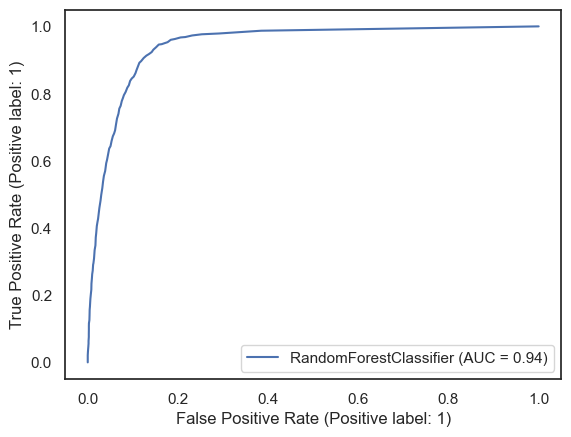

In [150]:
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prob)

# This model has an accuracy of 92% meaning that if it runs 100 predictions, it will get 92 correctly and 8 wrong
# Precision on predicting 'No': 94%,  Recall: 97%
# Precision on predicting 'Yes': 67,  Recall: 49%
# The precision and recall score of both 'Yes' and 'No' shows that the model is better at predicting 'No' than Ýes

# The AUC-ROC curve shows the AUC very high at 0.94 which is very close to 1 meaning this model has a good measure of seperability.
#      which implies that there is a 94% chance that the model will be able to distinguish betwween Yes and No.
# Simply put, ROC is a curve of probability while AUC is the area under the curve  

C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



 Accuracy Score : 
  0.894283476898982

 AUC Score : 
  0.7397602846188386

 Confusion Matrix : 
  [[6392  420]
 [ 390  460]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.94      0.94      0.94      6812
           1       0.52      0.54      0.53       850

    accuracy                           0.89      7662
   macro avg       0.73      0.74      0.74      7662
weighted avg       0.90      0.89      0.90      7662


 ROC curve : 
 


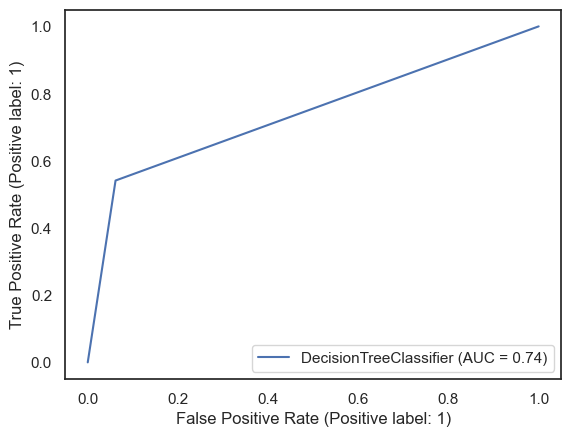

In [151]:
model = model_to_use('DT')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Predict probability for test data
y_pred_prob = model.predict_proba(X_test)
y_pred_prob = [x[1] for x in y_pred_prob]
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prob)


 Accuracy Score : 
  0.9160793526494387

 AUC Score : 
  0.9479771855894442

 Confusion Matrix : 
  [[6568  244]
 [ 399  451]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.94      0.96      0.95      6812
           1       0.65      0.53      0.58       850

    accuracy                           0.92      7662
   macro avg       0.80      0.75      0.77      7662
weighted avg       0.91      0.92      0.91      7662


 ROC curve : 
 


C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


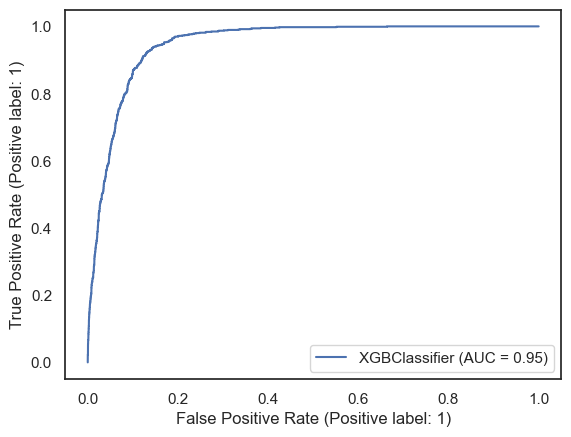

In [152]:
model = model_to_use('XGBC')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Predict probability for test data
y_pred_prob = model.predict_proba(X_test)
y_pred_prob = [x[1] for x in y_pred_prob]
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prob)

# Model Balancing

In [ ]:
#!pip install imblearn --user  # Instaling imblearn

In [1051]:
from imblearn.over_sampling import SMOTE

In [1052]:
# fit and apply the transform
SMOTE = SMOTE()
X_train_1, y_train_2 = SMOTE.fit_resample(X_train,y_train)

In [1053]:
y_train_2.value_counts()

0    27175
1    27175
Name: subscribed, dtype: int64


 Accuracy Score : 
  0.9147742103889324

 AUC Score : 
  0.9460132637905425

 Confusion Matrix : 
  [[6513  299]
 [ 354  496]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.95      0.96      0.95      6812
           1       0.62      0.58      0.60       850

    accuracy                           0.91      7662
   macro avg       0.79      0.77      0.78      7662
weighted avg       0.91      0.91      0.91      7662


 ROC curve : 
 


C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


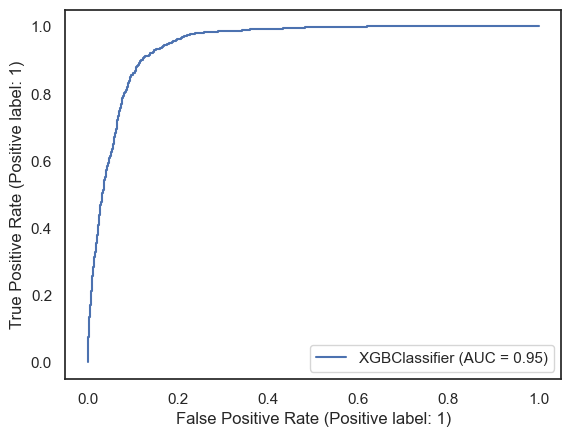

In [1054]:
model = model_to_use('XGBC')
model.fit(X_train_1,y_train_2)
y_pred = model.predict(X_test)

# Predict probability for test data
y_pred_prob = model.predict_proba(X_test)
y_pred_prob = [x[1] for x in y_pred_prob]
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prob)

C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



 Accuracy Score : 
  0.9104672409292612

 AUC Score : 
  0.9438843217850852

 Confusion Matrix : 
  [[6405  407]
 [ 279  571]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.96      0.94      0.95      6812
           1       0.58      0.67      0.62       850

    accuracy                           0.91      7662
   macro avg       0.77      0.81      0.79      7662
weighted avg       0.92      0.91      0.91      7662


 ROC curve : 
 


C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\FIBI FX\.conda\envs\new_env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


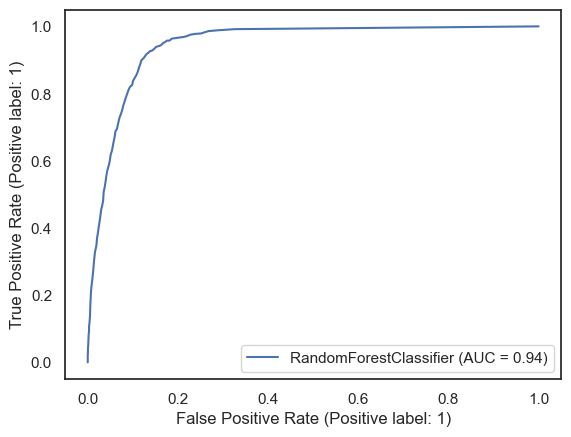

In [1055]:
model = model_to_use('RF')
model.fit(X_train_1,y_train_2)
y_pred = model.predict(X_test)

# Predict probability for test data
y_pred_prob = model.predict_proba(X_test)
y_pred_prob = [x[1] for x in y_pred_prob]
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prob)

# Upon balancing the model, accuracy dropped by 0.01 (1%)

## Settling for the Random forest model because it has a slightly better performance than the xgb interms of precission and recall

# Model Optimization

In [1058]:
#Define the parameters grid for random forest
param_grid_random_forest = {'max_depth': [10,20,40],
                          'n_estimators': [100,200,300],
                          'min_samples_leaf': [1,2,5]}

In [1059]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid = GridSearchCV(model,param_grid_random_forest, refit = True, n_jobs = 2)

# fit the model for grid search
grid.fit(X_train_1, y_train_2)

In [ ]:
grid.best_params_

In [ ]:
cv_results = pd.DataFrame(grid.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results.head()

 *** Using original random forest model because optimization of model took too long due to system capacity.***

In [ ]:
def bank_termdeposit_pred(d):
    d=d.replace('unknown', np.NaN)
    d.drop(['default', 'subscribed'],axis=1,inplace=True)
    d.dropna(inplace=True)
    result = encoder1.transform(d['education'].values.reshape(-1,1))
    d['education'] = result
    ab = ordinal_encoder.transform(d[ord_feat])
    cd = pd.DataFrame(ab, columns=ord_feat)
    d.drop(ord_feat, axis=1, inplace=True)
    d=pd.concat([d,cd],axis=1)
    encodertest = pd.DataFrame(encoder2.transform(d[nom_feat]).toarray())
    encodertest.columns = encoder2.get_feature_names_out()
    d = d.join(encodertest)
    d.drop(nom_feat,axis=1,inplace=True)
    #d['subscribed']=d['subscribed'].map({'no':0,'yes':1})
    d.drop(['pdays','emp.var.rate','nr.employed'],axis=1,inplace=True)
    
    
    x=scaler.transform(d)
    x_df = pd.DataFrame(x, columns=d.columns)
    
    x_df.dropna(inplace=True)
    pred_1=model.predict(x_df)
    if pred_1[0] ==1:
        return 'Potential subscriber'
    else:
        return 'Not likely to subscribe'

In [ ]:
bank_termdeposit_pred(test) 

In [ ]:
pickle.dump(encoder1, open('encoder1.pkl','wb'))

pickle.dump(ordinal_encoder, open('ordinal_encoder.pkl','wb'))

pickle.dump(encoder2, open('encoder2.pkl','wb'))

pickle.dump(scaler, open('scaler.pkl','wb'))

pickle.dump(model, open('model_fibi.pkl','wb'))

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train1)

X_train = scaler.transform(X_train1)

In [ ]:
df['education'].unique()

In [57]:
%%writefile Esther.py

import streamlit as st
import pickle
import pandas as pd
import numpy as np

encoder1 = 'encoder1.pkl'
encoder1 = pickle.load(open(encoder1, 'rb'))

ordinal_encoder = 'ordinal_encoder.pkl'
ordinal_encoder = pickle.load(open(ordinal_encoder, 'rb'))

encoder2 = 'encoder2.pkl'
encoder2 = pickle.load(open(encoder2, 'rb'))

scaler = 'scaler.pkl'
scaler = pickle.load(open(scaler, 'rb'))

model = 'model_fibi.pkl'
model = pickle.load(open(model, 'rb'))

st.header('Bank Marketing Campaign Prediction')

def user_input_features():
    AGE = st.number_input('Age',step=1)
    EDU = st.selectbox("Customer's level of education",['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'])
    JOB = st.selectbox("Customer's job",['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'])
    
    MARITAL = st.selectbox("Marital status",['married', 'single', 'divorced'])
    HOUSING = st.selectbox("Housing loan",['no', 'yes'])
    LOAN = st.selectbox("Personal loan",['no', 'yes'])
    CONTACT = st.selectbox("Mode of communication",['telephone', 'cellular'])
    POUT = st.selectbox("Previous campaign outcome",['nonexistent', 'failure', 'success'])
    
    MONTH = st.selectbox("Month of last contact",['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'])
    DOW = st.selectbox("Day of Last Contact",['mon', 'tue', 'wed', 'thu', 'fri'])
    DUR=st.number_input('Duration of Call',step=1)
    CAMP=st.number_input('Number of Contacts during this campaign',step=1)
    PREV=st.number_input('Number of Contacts Performed Before this Campaign',step=1)
    CPI=st.number_input('Consumer Price index - monthly indicator')
    CCI=st.number_input('Consumer Confidence Index - monthly indicator')
    EURBM=st.number_input('Euribor 3 month rate - daily indicator')
    
    data = {'age':AGE,'education':EDU,'job':JOB,'marital':MARITAL,'housing':HOUSING,
            'loan':LOAN,'contact':CONTACT,'poutcome':POUT,'month':MONTH,'day_of_week':DOW,
            'duration':DUR,'campaign':CAMP,'previous':PREV,'cons.price.idx':CPI,'cons.conf.idx':CCI,'euribor3m':EURBM}
    
    features = pd.DataFrame(data, columns=data.keys(), index=range(0, len(data)))
    return features
    
def bank_termdeposit_pred(d):
    d=d.replace('unknown', np.NaN)
    d.dropna(inplace=True)
    nom_feat = ['marital', 'housing', 'loan', 'contact', 'poutcome',]
    ord_feat = ['job','month','day_of_week']
    result = encoder1.transform(d['education'].values.reshape(-1,1))
    d['education'] = result
    ab = ordinal_encoder.transform(d[ord_feat])
    cd = pd.DataFrame(ab, columns=ord_feat)
    d.drop(ord_feat, axis=1, inplace=True)
    d=pd.concat([d,cd],axis=1)
    encodertest = pd.DataFrame(encoder2.transform(d[nom_feat]).toarray())
    encodertest.columns = encoder2.get_feature_names_out()
    d = d.join(encodertest)
    d.drop(nom_feat,axis=1,inplace=True)
    
    
    x=scaler.transform(d)
    x_df = pd.DataFrame(x, columns=d.columns)
    
    x_df.dropna(inplace=True)
    pred_1=model.predict(x_df)
    if pred_1[0] ==1:
        return 'Potential subscriber'
    else:
        return 'Not likely to subscribe'
    
    
data_df = user_input_features()

result = bank_termdeposit_pred(data_df)

if st.button('PREDICT'):
    bank_termdeposit_pred(data_df)
st.write(result)

Overwriting Esther.py


In [58]:
!streamlit run Esther.py

^C
